In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
%matplotlib inline

In [2]:
df=pd.read_csv(r'c:\Users\KIIT\Downloads\HR_comma_sep.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
# feature selection
array = df.values
X = df
X = X.drop(['Department','left','salary'],axis=1)
Y = df['left']
from numpy import set_printoptions
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:10,:])

[2.664e+03 6.468e-01 8.491e+00 7.660e+01 3.213e+02 3.673e+02 5.747e+01]
[[3.80e-01 1.57e+02 3.00e+00 0.00e+00]
 [8.00e-01 2.62e+02 6.00e+00 0.00e+00]
 [1.10e-01 2.72e+02 4.00e+00 0.00e+00]
 [7.20e-01 2.23e+02 5.00e+00 0.00e+00]
 [3.70e-01 1.59e+02 3.00e+00 0.00e+00]
 [4.10e-01 1.53e+02 3.00e+00 0.00e+00]
 [1.00e-01 2.47e+02 4.00e+00 0.00e+00]
 [9.20e-01 2.59e+02 5.00e+00 0.00e+00]
 [8.90e-01 2.24e+02 5.00e+00 0.00e+00]
 [4.20e-01 1.42e+02 3.00e+00 0.00e+00]]


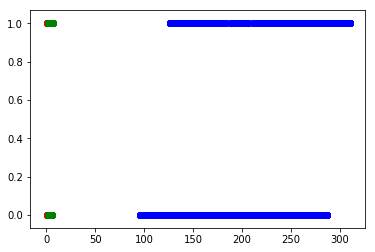

In [4]:
plt.scatter(X['last_evaluation'], df.left,color=('r'))
plt.scatter(X['average_montly_hours'], df.left,color=('b'))
plt.scatter(X['number_project'], df.left,color=('g'))
c=X[['last_evaluation','average_montly_hours','number_project']]


In [5]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X1= X.average_montly_hours.values
#scaler.fit(X1);
X_train, X_test, y_train, y_test = train_test_split(c,Y,test_size=0.8)

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)


C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
model.score(X_test,y_test)

0.7598333333333334

In [8]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)